Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [137]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [162]:
# !pwd
# %cd ..
# %cd ./home
# !ls
# !rm -r datasets

/content
/
/home
datasets


In [163]:
# %cd ..
# %cd ./content

/
/content


In [164]:
!unzip -u "/content/gdrive/MyDrive/Colab Notebooks/CNN Practice and Assignment/CNN-Building CNN with Python and Keras/CNN_assignment.zip" -d "/home/datasets"

Archive:  /content/gdrive/MyDrive/Colab Notebooks/CNN Practice and Assignment/CNN-Building CNN with Python and Keras/CNN_assignment.zip
  inflating: /home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: /home/datasets/Skin cancer ISIC The International Skin Imag

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    color_mode="rgb",
    image_size=(img_height,img_width),
    batch_size = batch_size
)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    color_mode="rgb",
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

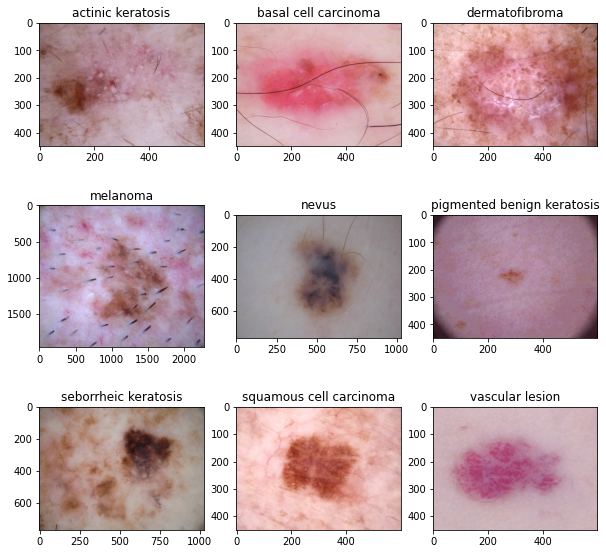

In [12]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


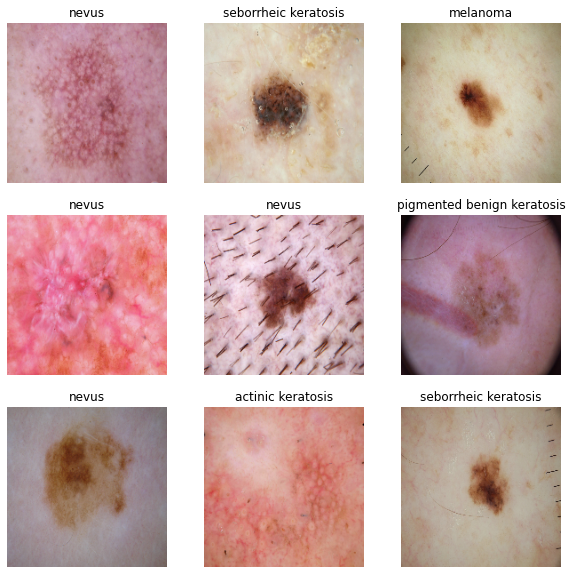

In [13]:
import matplotlib.pyplot as plt

### just to visualise data using tf dataset
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(2):
  #print(images.get_shape())
  #print(labels.get_shape())
  #print(labels.numpy())
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [15]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [16]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model2 = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [17]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])    
              


In [19]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Train the model

In [21]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 27s 88ms/step - loss: 2.0471 - accuracy: 0.1987 - val_loss: 2.0171 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 2s 33ms/step - loss: 1.8374 - accuracy: 0.3108 - val_loss: 1.6826 - val_accuracy: 0.3870
Epoch 3/20
56/56 [==============================] - 2s 33ms/step - loss: 1.6504 - accuracy: 0.3968 - val_loss: 1.6084 - val_accuracy: 0.4519
Epoch 4/20
56/56 [==============================] - 2s 33ms/step - loss: 1.5884 - accuracy: 0.4196 - val_loss: 1.6430 - val_accuracy: 0.3736
Epoch 5/20
56/56 [==============================] - 2s 33ms/step - loss: 1.5636 - accuracy: 0.4369 - val_loss: 1.5472 - val_accuracy: 0.4609
Epoch 6/20
56/56 [==============================] - 2s 35ms/step - loss: 1.5675 - accuracy: 0.4481 - val_loss: 1.6109 - val_accuracy: 0.4318
Epoch 7/20
56/56 [==============================] - 2s 36ms/step - loss: 1.4893 - accuracy: 0.4738 - val_loss: 1.4656 - val_accuracy: 0.4922
Epoch 8/20
56/56 [=====

In [22]:
epochs = 20
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 38ms/step - loss: 2.0726 - accuracy: 0.1869 - val_loss: 2.0359 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 2s 34ms/step - loss: 2.0329 - accuracy: 0.1992 - val_loss: 2.0469 - val_accuracy: 0.2081
Epoch 3/20
56/56 [==============================] - 2s 34ms/step - loss: 1.9567 - accuracy: 0.2366 - val_loss: 1.8989 - val_accuracy: 0.2416
Epoch 4/20
56/56 [==============================] - 2s 34ms/step - loss: 1.8425 - accuracy: 0.3069 - val_loss: 1.8336 - val_accuracy: 0.2886
Epoch 5/20
56/56 [==============================] - 2s 34ms/step - loss: 1.7338 - accuracy: 0.3571 - val_loss: 1.6735 - val_accuracy: 0.3803
Epoch 6/20
56/56 [==============================] - 2s 34ms/step - loss: 1.6745 - accuracy: 0.3594 - val_loss: 1.6187 - val_accuracy: 0.4139
Epoch 7/20
56/56 [==============================] - 2s 34ms/step - loss: 1.6635 - accuracy: 0.3917 - val_loss: 1.6322 - val_accuracy: 0.3982
Epoch 8/20
56

### Visualizing training results

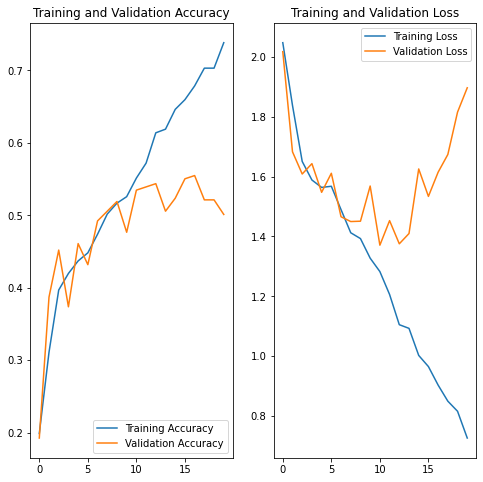

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

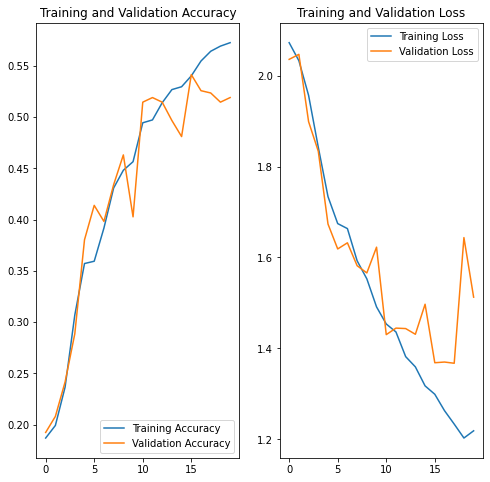

In [24]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

**Finding on the models i.e. model and model2**


* The model is overfitting because we can see difference in loss functions in training & validataion dataset. The difference increases as we can observe from the grapgh
* The accuracy is just around 75-80% for model 1 and 60-65 for model 2 because there are enough features to remember the pattern.
* So model 1 is better than model 2 but both the models are not acceptable and need further improvement.

In [25]:
 # Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

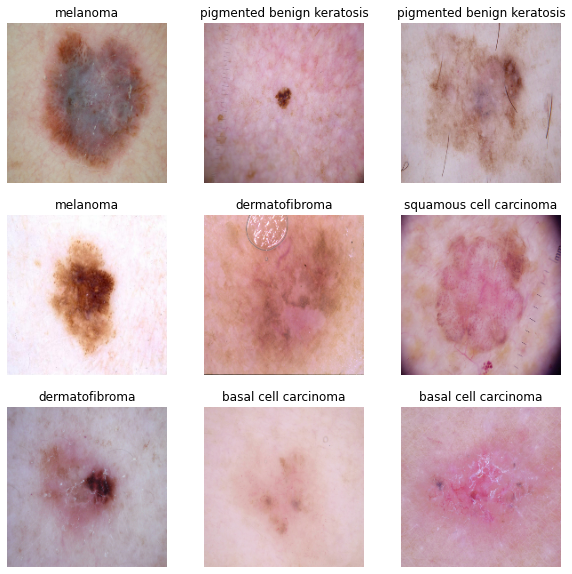

In [26]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes 
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Todo:
### Create the model, compile and train the model


In [40]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here

## added data_aygment to the model 

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
def get_augmented_model_with_dropout():
  model = Sequential([ data_augument,
                      layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
        
  ])
  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu', input_shape = (180, 180, 32)))
  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))


  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))


  model.add(Flatten())
  model.add(Dense(512,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = "softmax"))
  return model



### Compiling the model

In [43]:
## Your code goes here
def compile_model_adam_sparse_categorical_cross_entropy(model_to_compile):
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [44]:
## Your code goes here, note: train your model for 20 epochs
model = get_augmented_model_with_dropout()
compile_model_adam_sparse_categorical_cross_entropy(model)
epochs = 20
history =  model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 4s 41ms/step - loss: 2.0517 - accuracy: 0.2277 - val_loss: 1.9705 - val_accuracy: 0.2796
Epoch 2/20
56/56 [==============================] - 2s 37ms/step - loss: 1.8115 - accuracy: 0.3460 - val_loss: 1.7526 - val_accuracy: 0.3781
Epoch 3/20
56/56 [==============================] - 2s 38ms/step - loss: 1.8124 - accuracy: 0.3348 - val_loss: 1.7713 - val_accuracy: 0.3177
Epoch 4/20
56/56 [==============================] - 2s 38ms/step - loss: 1.6568 - accuracy: 0.3744 - val_loss: 1.6671 - val_accuracy: 0.4049
Epoch 5/20
56/56 [==============================] - 2s 38ms/step - loss: 1.7208 - accuracy: 0.3655 - val_loss: 1.6227 - val_accuracy: 0.4228
Epoch 6/20
56/56 [==============================] - 2s 38ms/step - loss: 1.6173 - accuracy: 0.4163 - val_loss: 1.5815 - val_accuracy: 0.4430
Epoch 7/20
56/56 [==============================] - 2s 37ms/step - loss: 1.5793 - accuracy: 0.4436 - val_loss: 1.6224 - val_accuracy: 0.4161
Epoch 8/20
56/56 [======

### Visualizing the results

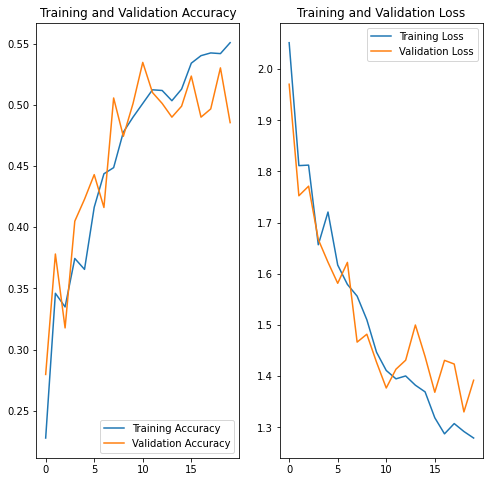

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/30
56/56 [==============================] - 4s 41ms/step - loss: 2.0735 - accuracy: 0.2154 - val_loss: 2.0223 - val_accuracy: 0.2058
Epoch 2/30
56/56 [==============================] - 2s 37ms/step - loss: 1.9112 - accuracy: 0.3075 - val_loss: 1.7364 - val_accuracy: 0.4273
Epoch 3/30
56/56 [==============================] - 2s 38ms/step - loss: 1.6258 - accuracy: 0.4196 - val_loss: 1.5967 - val_accuracy: 0.4340
Epoch 4/30
56/56 [==============================] - 2s 38ms/step - loss: 1.5159 - accuracy: 0.4799 - val_loss: 1.5973 - val_accuracy: 0.4474
Epoch 5/30
56/56 [==============================] - 2s 38ms/step - loss: 1.4778 - accuracy: 0.4794 - val_loss: 1.5751 - val_accuracy: 0.4899
Epoch 6/30
56/56 [==============================] - 2s 38ms/step - loss: 1.4707 - accuracy: 0.4833 - val_loss: 1.5520 - val_accuracy: 0.4586
Epoch 7/30
56/56 [==============================] - 2s 37ms/step - loss: 1.4798 - accuracy: 0.4738 - val_loss: 1.4603 - val_accuracy: 0.4899
Epoch 8/30
56

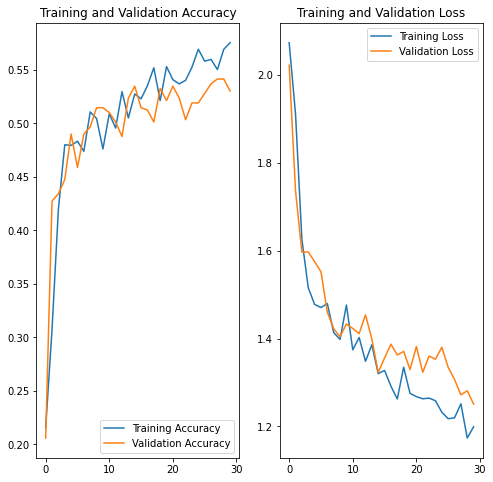

In [46]:
# try to improve the accuracy with higher epochs, trying different values
epochs = 30
model = get_augmented_model_with_dropout()
compile_model_adam_sparse_categorical_cross_entropy(model)
history =  model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?**

### Conclusions based on Manual Augmented Model


*   Although the accuracy has decreased but, we can see that the over fitting issue is fixed because of the use of augmentation.
*   We also observe that with the increase in epochs, the variance is further reduced and the accuracy has also improved slightly.
* We can look for other epochs values as well



# **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [48]:
## Your code goes here.

file_name_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
      j = str(j)
      file_name_list.append(j.rsplit("/",1)[1])
      lesion_list.append(i)
dataframe_dict_original = dict(zip(file_name_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['FileName','Label'])
original_df

,FileName,Label
0,ISIC_0031506.jpg,actinic keratosis
1,ISIC_0030142.jpg,actinic keratosis
2,ISIC_0027884.jpg,nevus
3,ISIC_0027950.jpg,nevus
4,ISIC_0031609.jpg,actinic keratosis
...,...,...
2097,ISIC_0029439.jpg,vascular lesion
2098,ISIC_0025596.jpg,vascular lesion
2099,ISIC_0030956.jpg,vascular lesion
2100,ISIC_0031201.jpg,vascular lesion


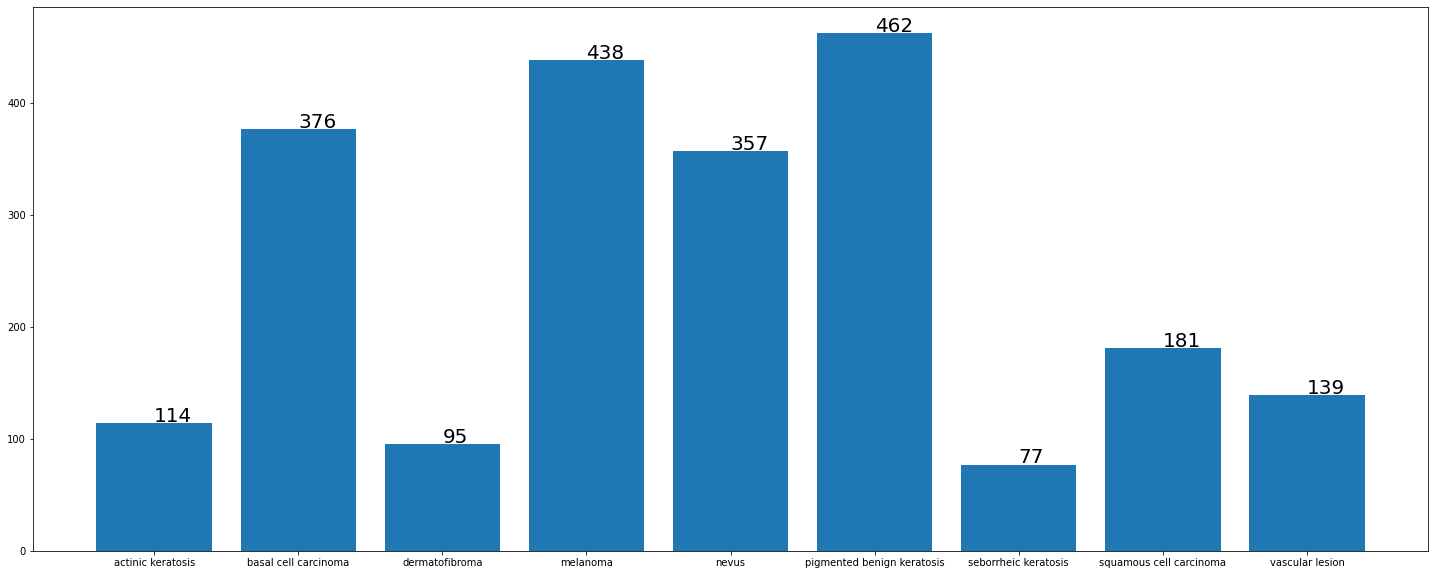

In [52]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
fig, ax = plt.subplots(figsize=(25,10))
ax.bar(class_names,count)
for index,data in enumerate(count):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?



1.   **seborrheic keratosis** has least number of samples
2.   In terms of proportionate number of samples, actinic keratosis and dematofibroma are proportionate and melonama and pigmented benign keratosis are porportionate. The **dominant** in terms proportionate number of samples are **melonama and pigmented benign keratosis**


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [53]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [165]:
data_dir_train

PosixPath('/home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [166]:
type(os.path.join(path_to_training_dataset, class_names[0]))
os.path.join(path_to_training_dataset, class_names[0])

'/home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis'

In [168]:
path_to_training_dataset= str(data_dir_train)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset, i), save_format="jpg")
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2D0BF59D90>: 100%|██████████| 500/500 [00:21<00:00, 22.95 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2D0CAB15D0>: 100%|██████████| 500/500 [00:19<00:00, 25.52 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2D0C1CC7D0>: 100%|██████████| 500/500 [00:19<00:00, 25.05 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F2D0C1EA8D0>: 100%|██████████| 500/500 [01:40<00:00,  4.97 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1019x717 at 0x7F2D2606B350>: 100%|██████████| 500/500 [01:40<00:00,  4.98 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F2D0C21EAD0>: 100%|██████████| 500/500 [00:22<00:00, 22.34 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F2D0C0E5E90>: 100%|██████████| 500/500 [00:50<00:00,  9.82 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2D0C209710>: 100%|██████████| 500/500 [00:19<00:00, 25.34 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2D0BF5BC90>: 100%|██████████| 500/500 [00:19<00:00, 25.25 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [169]:
import glob
print(glob.glob("/home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/*/output/*.jpg"))

['/home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027801.jpg_a662da9b-7e95-436e-91ab-756a4df7b4be.jpg', '/home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026291.jpg_9370c1ed-3140-4f37-b759-5df92d9f9c0a.jpg', '/home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026301.jpg_35fecb46-eda6-4e49-8ebe-93e25e6ab445.jpg', '/home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027735.jpg_aafb8e39-02bb-4152-9f80-b37209f7c47f.jpg', '/home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosi

In [100]:
# print(data_dir_train)
# output_path = pathlib.Path(os.path.join(data_dir_train,"output"))
# output_path

/home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train
gdrive	sample_data


In [170]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [171]:
#path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
file_name_new = [str(x).rsplit("/",1)[1] for x in data_dir_train.glob('*/output/*.jpg')]
file_name_new

['pigmented benign keratosis_original_ISIC_0027801.jpg_a662da9b-7e95-436e-91ab-756a4df7b4be.jpg',
 'pigmented benign keratosis_original_ISIC_0026291.jpg_9370c1ed-3140-4f37-b759-5df92d9f9c0a.jpg',
 'pigmented benign keratosis_original_ISIC_0026301.jpg_35fecb46-eda6-4e49-8ebe-93e25e6ab445.jpg',
 'pigmented benign keratosis_original_ISIC_0027735.jpg_aafb8e39-02bb-4152-9f80-b37209f7c47f.jpg',
 'pigmented benign keratosis_original_ISIC_0027154.jpg_9649a028-fb83-4340-b3d4-3422d6da7eed.jpg',
 'pigmented benign keratosis_original_ISIC_0026843.jpg_fbc937bc-2bce-42b1-be66-b152d2b37e7d.jpg',
 'pigmented benign keratosis_original_ISIC_0028180.jpg_e5e278ba-8ee5-4395-be7c-ea27a5e4b7ed.jpg',
 'pigmented benign keratosis_original_ISIC_0025222.jpg_e93c09c9-495c-4bd1-bb53-ba1bb4969c96.jpg',
 'pigmented benign keratosis_original_ISIC_0024772.jpg_574668fa-a14d-48a0-8122-cb262823464b.jpg',
 'pigmented benign keratosis_original_ISIC_0027533.jpg_b1e19145-914e-4da0-baeb-bca3344cde62.jpg',
 'pigmented benign k

In [172]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in data_dir_train.glob('*/output/*.jpg')]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [173]:
dataframe_dict_new = dict(zip(file_name_new, lesion_list_new))

In [174]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['FileName','Label'])
new_df = original_df.append(df2)

In [175]:
new_df

,FileName,Label
0,ISIC_0031506.jpg,actinic keratosis
1,ISIC_0030142.jpg,actinic keratosis
2,ISIC_0027884.jpg,nevus
3,ISIC_0027950.jpg,nevus
4,ISIC_0031609.jpg,actinic keratosis
...,...,...
4495,melanoma_original_ISIC_0010772.jpg_0284f8e5-90...,melanoma
4496,melanoma_original_ISIC_0010971.jpg_84f0f636-ac...,melanoma
4497,melanoma_original_ISIC_0011135.jpg_bdd9f596-e3...,melanoma
4498,melanoma_original_ISIC_0011031.jpg_feefaecc-1a...,melanoma


In [176]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
basal cell carcinoma          876
melanoma                      863
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
dermatofibroma                595
seborrheic keratosis          577
actinic keratosis             552
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [177]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [178]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train = pathlib.Path("/home/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [179]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [129]:
# for x, y in train_ds.take(1):
#   print(x.shape, y)

# train_ds.class_names

(5392, 180, 180, 3) tf.Tensor([1 1 5 ... 5 1 5], shape=(5392,), dtype=int32)


['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'output',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Create a validation dataset

In [180]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [186]:
## your code goes here
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_51 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_52 (Conv2D)          (None, 90, 90, 64)        18496     
                                                     

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [187]:
## your code goes here

## compiling above model using our pre defined function
compile_model_adam_sparse_categorical_cross_entropy(model)

#### **Todo:**  Train your model

In [188]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 36s 203ms/step - loss: 2.1701 - accuracy: 0.1834 - val_loss: 2.0340 - val_accuracy: 0.2257
Epoch 2/30
169/169 [==============================] - 34s 193ms/step - loss: 1.9128 - accuracy: 0.2786 - val_loss: 1.6284 - val_accuracy: 0.3853
Epoch 3/30
169/169 [==============================] - 29s 167ms/step - loss: 1.5917 - accuracy: 0.3872 - val_loss: 1.3918 - val_accuracy: 0.4521
Epoch 4/30
169/169 [==============================] - 29s 168ms/step - loss: 1.4247 - accuracy: 0.4520 - val_loss: 1.2924 - val_accuracy: 0.5041
Epoch 5/30
169/169 [==============================] - 30s 169ms/step - loss: 1.3038 - accuracy: 0.5093 - val_loss: 1.3171 - val_accuracy: 0.5041
Epoch 6/30
169/169 [==============================] - 30s 173ms/step - loss: 1.2004 - accuracy: 0.5540 - val_loss: 1.2114 - val_accuracy: 0.5523
Epoch 7/30
169/169 [==============================] - 29s 168ms/step - loss: 1.0838 - accuracy: 0.6092 - val_loss: 1.1002 - val_accuracy: 0.5

#### **Todo:**  Visualize the model results

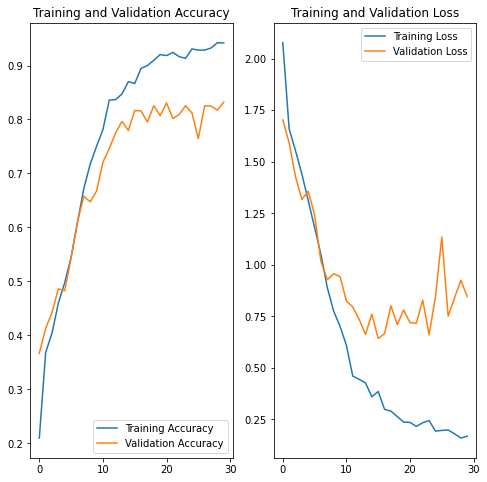

In [184]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1.   The accuracy of the model has increased significantly with the use of Augmentor. It solved the issue of class imbalance.
2.   As it can be seen that there is still some issue related to overfitting.
3. The model can be further improved by changing hyper parameters and making adjustments to the model architecture, i.e. number of layers, neurons and dropout layers



